# ÏÑ±Í≥ºÏ†ïÎ≥¥ EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Î™©Î°ùÏùÑ Í∞±Ïã†ÌïòÍ≥†, 'NanumGothic' Ìè∞Ìä∏Î•º Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         'Í∏∞Ï§ÄÎÖÑÏõî'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['Í∏∞Ï§ÄÎÖÑÏõî'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [3]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

perf_df, perf_test_df = load_data("8.ÏÑ±Í≥ºÏ†ïÎ≥¥")

X = perf_df.drop(columns=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201807_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201808_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201809_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201810_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201811_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201812_train_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
üîπ Shape : (2400000, 49)

‚úÖ File: ../../dataset/test/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201807_test_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201808_test_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201809_test_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201810_test_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/8.ÏÑ±Í≥ºÏ†ïÎ≥¥\201811_test_ÏÑ±Í≥ºÏ†ïÎ≥¥.parquet Com

In [5]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 49 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Í∏∞Ï§ÄÎÖÑÏõî                uint32 
 1   ID                  object 
 2   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî      float16
 3   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî      float16
 4   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî     float16
 5   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî      float16
 6   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî      float16
 7   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî      float16
 8   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî     float16
 9   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî      float16
 10  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî      float16
 11  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî     float16
 12  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî      float16
 13  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_CA_Ï†ÑÏõî      float16
 14  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî      float16
 15  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïπ¥Îìú

In [6]:
performance_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Í∏∞Ï§ÄÎÖÑÏõî                600000 non-null  uint32 
 1   ID                  600000 non-null  object 
 2   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî      600000 non-null  float16
 3   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî      600000 non-null  float16
 4   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî     600000 non-null  float16
 5   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî      600000 non-null  float16
 6   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî      600000 non-null  float16
 7   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî      600000 non-null  float16
 8   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî     600000 non-null  float16
 9   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî      600000 non-null  float16
 10  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî      600000 non-null  float16
 11  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏã

In [8]:
float_columns = performance_df.select_dtypes(include=['float16']).columns
float_columns

Index(['Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_CA_Ï†ÑÏõî',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞',
       'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï

In [9]:
float_unique_values = {col: performance_df[col].unique() for col in float_columns}
float_unique_values

{'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî': array([ 4.546e-01, -5.117e-01, -6.274e-02, ..., -3.414e-04, -1.714e-03,
         8.565e-05], shape=(25279,), dtype=float16),
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî': array([ 4.546e-01, -5.117e-01, -6.274e-02, ..., -3.414e-04, -1.714e-03,
         8.565e-05], shape=(25268,), dtype=float16),
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî': array([ 3.647e-01, -5.117e-01,  6.787e-02, ..., -1.402e-04, -3.414e-04,
        -1.714e-03], shape=(25217,), dtype=float16),
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî': array([ 2.    ,  0.    , -2.    , -0.584 , -0.579 , -0.5845, -0.58  ,
        -0.5806, -0.59  , -0.586 , -0.5854, -0.5903, -0.576 , -0.5767,
        -0.575 , -0.5757, -0.577 , -0.583 , -0.581 , -0.5815, -0.5786,
        -0.5684, -0.5796, -0.5864, -0.585 , -0.5825, -0.5874, -0.5776,
        -0.589 , -0.578 , -0.5835, -0.5747, -0.582 , -0.587 , -0.592 ,
        -0.574 , -0.588 , -0.573 , -0.5728, -0.591 , -0.5737, -0.5884,
        -0.5933, -0.572 , -0.571 

In [10]:
drop_cols = [col for col in float_unique_values if performance_df[col].nunique() <= 1]
print(f"üîπ column Ïàò: {len(drop_cols)}")
drop_cols

üîπ column Ïàò: 0


[]

In [11]:
int_columns = performance_df.select_dtypes(include=['integer']).columns
int_columns

Index(['Í∏∞Ï§ÄÎÖÑÏõî'], dtype='object')

In [ ]:
performance_df.isnull().sum()

# Í≤∞Í≥º : ÌòúÌÉùÏàòÌòúÏú®_R3M, ÌòúÌÉùÏàòÌòúÏú®_B0MÏóê Í≤∞Ï∏°Ïπò Ï°¥Ïû¨

Í∏∞Ï§ÄÎÖÑÏõî                       0
ID                         0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî            0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî            0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî            0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_CA_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî            0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞             0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞            0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î∂ÑÍ∏∞             0
Ï¶ùÍ∞êÏú®_Ïù¥Ï

In [19]:
target_column = ['ÌòúÌÉùÏàòÌòúÏú®_R3M', 'ÌòúÌÉùÏàòÌòúÏú®_B0M']

for col in target_column:
    performance_df[col] = performance_df[col].fillna(0)
    performance_test_df[col] = performance_test_df[col].fillna(0)

In [20]:
performance_df.isnull().sum()

Í∏∞Ï§ÄÎÖÑÏõî                  0
ID                    0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî       0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî       0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî       0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_CA_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî       0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞       0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î∂ÑÍ∏∞        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Î∂ÑÍ∏∞        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞        0
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥

## Feature Selection

In [21]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî', 'Segment']]

performance_df = performance_df.merge(segment_df, on=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'], how='left')

In [22]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBMÏùÑ Ïù¥Ïö©Ìï¥ Feature ImportanceÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÉÅÏúÑ featureÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    
    Parameters:
    - X (pd.DataFrame): feature Îç∞Ïù¥ÌÑ∞
    - y (pd.Series or np.array): target Îç∞Ïù¥ÌÑ∞
    - importance_type (str): 'gain' ÎòêÎäî 'split' (Ï§ëÏöîÎèÑ Í∏∞Ï§Ä)
    - plot_top_n (int): Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ feature Î™á Í∞úÎ•º plotÌï†ÏßÄ
    - random_state (int): seed Í≥†Ï†ï

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - model (lgb.Booster): ÌïôÏäµÎêú LightGBM Î™®Îç∏
    """

    # LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞ (Í∞ÄÎ≥çÍ≤å ÌïôÏäµ)
    params = {
        'objective': 'multiclass',   # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
        'num_class': 5,  # ÌÅ¥ÎûòÏä§ Ïàò ÏûêÎèô ÏßÄÏ†ï
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î°úÏßÄ ÏÜêÏã§
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # Îπ†Î•¥Í≤å ÌïôÏäµ (ÏóêÌè¨ÌÅ¨ 100ÌöåÎ°ú Ï†úÌïú)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance Í∞ÄÏ†∏Ïò§Í∏∞
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # ÏãúÍ∞ÅÌôî
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model

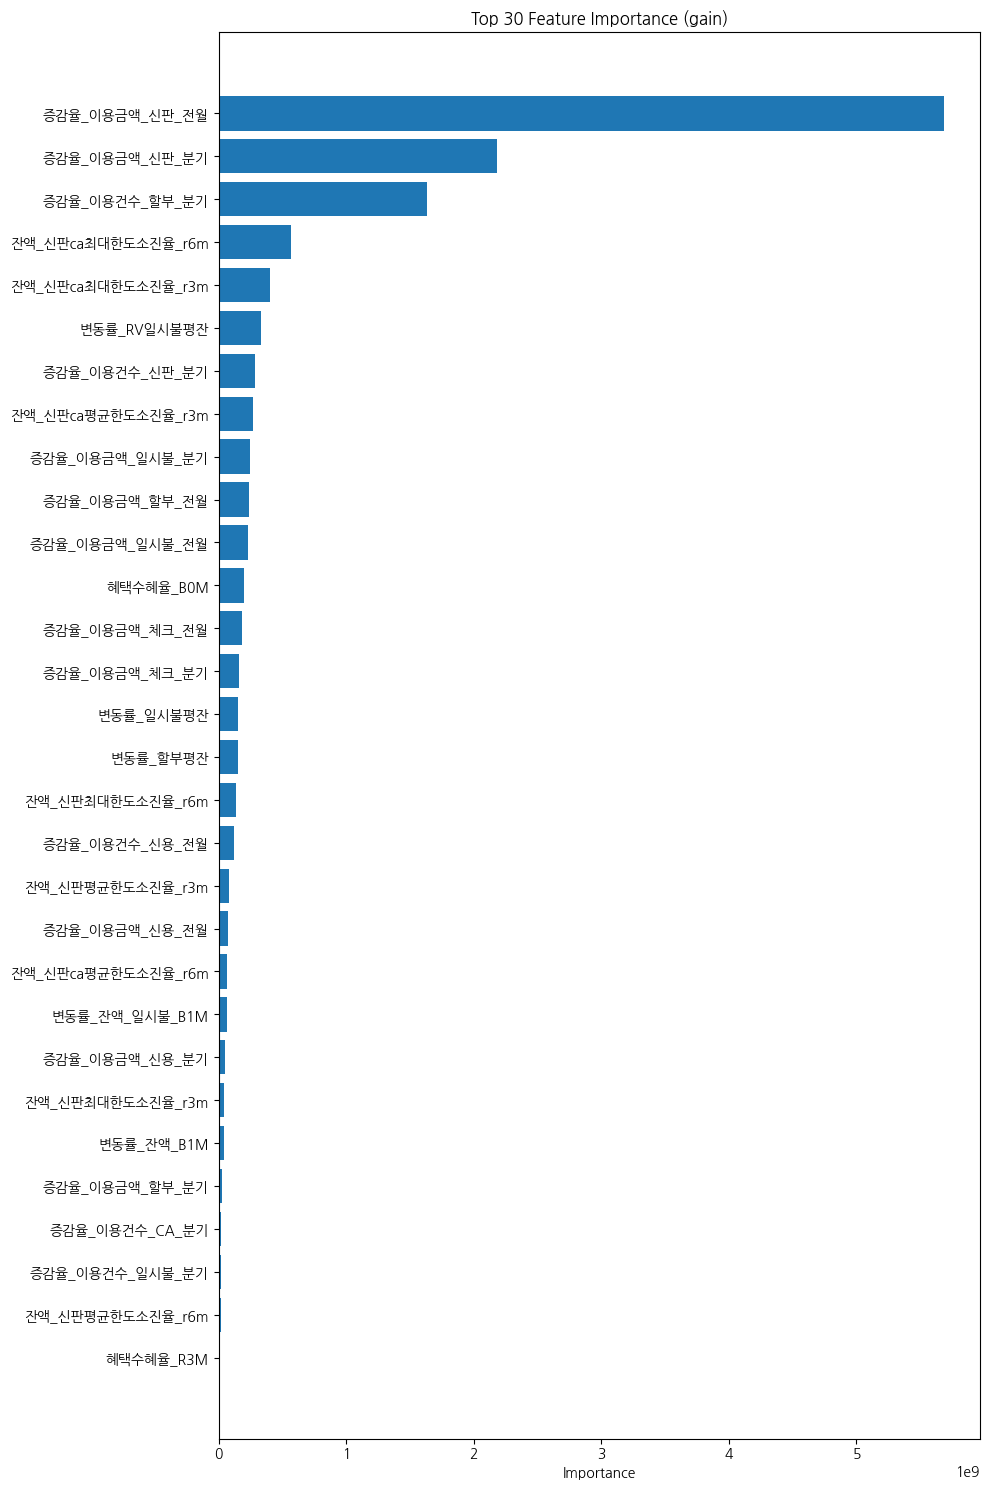

In [24]:
X = performance_df.drop(columns=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(performance_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=30)

In [25]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    Ï§ëÏöîÎèÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏÉÅÏúÑ top_percent ÎπÑÏú®ÎßåÌÅº featureÎ•º ÏÑ†ÌÉùÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖã Ï∂îÏ∂ú

    Parameters:
    - importance_df (pd.DataFrame): featureÏôÄ importanceÎ•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - X (pd.DataFrame): ÏõêÎ≥∏ feature Îç∞Ïù¥ÌÑ∞ÏÖã
    - top_percent (float): ÏÉÅÏúÑ Î™á %Î•º ÏÑ†ÌÉùÌï†ÏßÄ (Í∏∞Î≥∏ 30%)

    Returns:
    - X_top (pd.DataFrame): ÏÉÅÏúÑ featureÎßå ÏÑ†ÌÉùÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - selected_features (list): ÏÑ†ÌÉùÎêú feature Î¶¨Ïä§Ìä∏
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [26]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.4)
print(f"üîπ ÏÑ†ÌÉùÎêú feature Ïàò: {len(selected_features)}")
print(f"üîπ ÏÑ†ÌÉùÎêú feature: {selected_features}")

üîπ ÏÑ†ÌÉùÎêú feature Ïàò: 18
üîπ ÏÑ†ÌÉùÎêú feature: ['Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î∂ÑÍ∏∞', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m', 'Î≥ÄÎèôÎ•†_RVÏùºÏãúÎ∂àÌèâÏûî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞', 'ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî', 'ÌòúÌÉùÏàòÌòúÏú®_B0M', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞', 'Î≥ÄÎèôÎ•†_ÏùºÏãúÎ∂àÌèâÏûî', 'Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî', 'ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî']


In [27]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    ÏÉÅÏúÑ featureÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ≥†, 
    threshold Ïù¥ÏÉÅÏù∏ featureÏåçÏùÑ Ï∂úÎ†•

    Parameters:
    - X_top (pd.DataFrame): ÏÉÅÏúÑ feature Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - threshold (float): ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ°ú Í∞ÑÏ£ºÌï† Í∏∞Ï§Ä
    """
    # ÏàòÏπòÏπòÌòï featureÎßå ÏÑ†ÌÉù
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ ÏÉùÏÑ± ÏôÑÎ£å..!")

    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold Ïù¥ÏÉÅÏù∏ feature Ïåç Ï∂úÎ†•
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\nÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ïù¥ÏÉÅÏù∏ feature Ïåç:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"üîπ{f1} vs {f2}: ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr:.3f}")
    else:
        print(f"\nÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ïù¥ÏÉÅÏù∏ feature ÏåçÏù¥ ÏóÜÏäµÎãàÎã§.")
    
    return high_corr_pairs

 ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ ÏÉùÏÑ± ÏôÑÎ£å..!


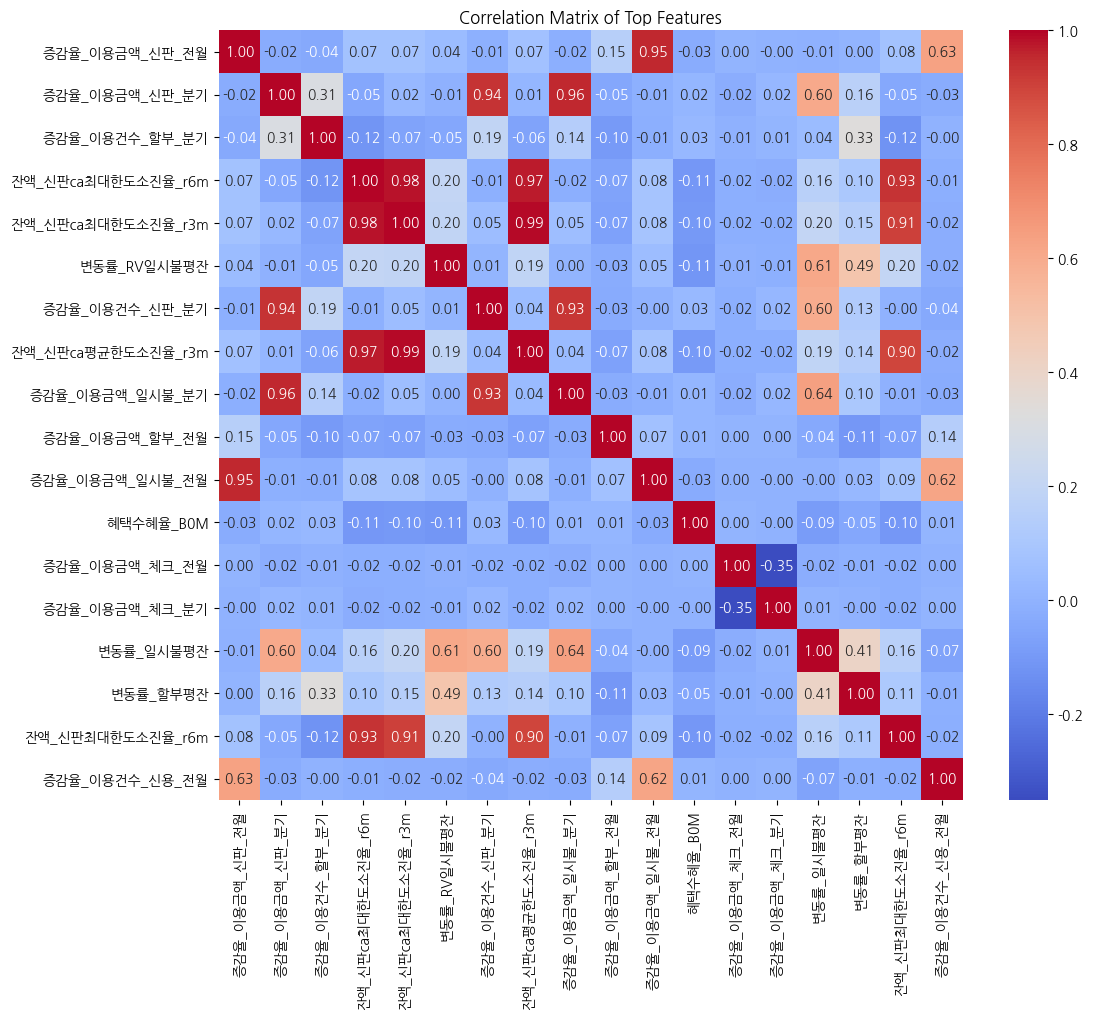


ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8 Ïù¥ÏÉÅÏù∏ feature Ïåç:
üîπÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m vs ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.994
üîπÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m vs ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.980
üîπÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m vs ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.973
üîπÏ¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞ vs Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.957
üîπÏ¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî vs Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.953
üîπÏ¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞ vs Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.936
üîπÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m vs ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.934
üîπÏ¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞ vs Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.931
üîπÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m vs ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m: ÏÉÅÍ¥ÄÍ≥

In [28]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8 Ïù¥ÏÉÅÏù∏ feature ÏåçÏùÑ ÏãúÍ∞ÅÌôî
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [29]:
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
high_corr_pairs

[('ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m', np.float64(0.9940693005845391)),
 ('ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', np.float64(0.9799220327615417)),
 ('ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', np.float64(0.9731514076094109)),
 ('Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞', np.float64(0.9572654576986132)),
 ('Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî', np.float64(0.9534996028353655)),
 ('Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞', np.float64(0.9360494343552898)),
 ('ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', 'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m', np.float64(0.9338753939982063)),
 ('Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞', 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞', np.float64(0.9305121721401673)),
 ('ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m

In [30]:
features_to_drop = set()
for f1, f2, corr in high_corr_pairs:
    if corr > 0.9:
        if f1 not in features_to_drop and f2 not in features_to_drop:
            features_to_drop.add(f1)

features_to_drop

{'ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m',
 'ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m',
 'ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m',
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞',
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞',
 'Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî'}

In [31]:
for col in features_to_drop:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî      float16
 1   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞      float16
 2   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î∂ÑÍ∏∞      float16
 3   ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m  float16
 4   Î≥ÄÎèôÎ•†_RVÏùºÏãúÎ∂àÌèâÏûî         float16
 5   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî      float16
 6   ÌòúÌÉùÏàòÌòúÏú®_B0M           float16
 7   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî      float16
 8   Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞      float16
 9   Î≥ÄÎèôÎ•†_ÏùºÏãúÎ∂àÌèâÏûî           float16
 10  Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî            float16
 11  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî      float16
dtypes: float16(12)
memory usage: 54.9 MB


In [32]:
filtered_performance_df = performance_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'] + X_top.columns.tolist()]
filtered_performance_df.to_parquet('../dataset/train/performance.parquet', index=False)

filtered_performance_test_df = performance_test_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'] + X_top.columns.tolist()]
filtered_performance_test_df.to_parquet('../dataset/test/performance.parquet', index=False)